In [28]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import random
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt

In [6]:
url = 'https://es.wikipedia.org/wiki/Web_scraping'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [29]:
content = soup.find('div', class_='mw-parser-output')
parrafos = content.find_all('p')

In [30]:
parrafos

[<p><i><b>Web scraping</b></i> o <b>raspado web</b> es una técnica utilizada mediante <a href="/wiki/Programa_inform%C3%A1tico" title="Programa informático">programas de software</a> para extraer información de <a href="/wiki/Sitio_web" title="Sitio web">sitios web</a>.<sup class="mw-references reference separada" id="cite_ref-(1)_Martí,_Sitelabs,_2016_1-0"><a href="#cite_note-(1)_Martí,_Sitelabs,_2016-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup>​ Usualmente, estos programas simulan la navegación de un humano en la <a href="/wiki/World_Wide_Web" title="World Wide Web">World Wide Web</a> ya sea utilizando el <a class="mw-redirect" href="/wiki/Hypertext_Transfer_Protocol" title="Hypertext Transfer Protocol">protocolo HTTP</a> manualmente, o incrustando un <a href="/wiki/Navegador_web" title="Navegador web">navegador</a> en una <a class="mw-redirect" href="/wiki/Aplicaci%C3%B3n_inform%C3%A1tica" title="Aplicación informática">aplicación</a>.
 </p>,


In [32]:
parrafos = str(soup.find_all("p"))

In [33]:
parrafos

'[<p><i><b>Web scraping</b></i> o <b>raspado web</b> es una técnica utilizada mediante <a href="/wiki/Programa_inform%C3%A1tico" title="Programa informático">programas de software</a> para extraer información de <a href="/wiki/Sitio_web" title="Sitio web">sitios web</a>.<sup class="mw-references reference separada" id="cite_ref-(1)_Martí,_Sitelabs,_2016_1-0"><a href="#cite_note-(1)_Martí,_Sitelabs,_2016-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup>\u200b Usualmente, estos programas simulan la navegación de un humano en la <a href="/wiki/World_Wide_Web" title="World Wide Web">World Wide Web</a> ya sea utilizando el <a class="mw-redirect" href="/wiki/Hypertext_Transfer_Protocol" title="Hypertext Transfer Protocol">protocolo HTTP</a> manualmente, o incrustando un <a href="/wiki/Navegador_web" title="Navegador web">navegador</a> en una <a class="mw-redirect" href="/wiki/Aplicaci%C3%B3n_inform%C3%A1tica" title="Aplicación informática">aplicación</a>.\n

In [34]:
print(parrafos.count("información"))
print(parrafos.count("web"))
print(parrafos.count("scraping"))

6
28
10


In [22]:
def buscar_palabra(palabra):
  ocurrencias = str(soup).lower().count(palabra.lower())
  print(f"Encontraste la plabra '{palabra}' {ocurrencias} veces")

In [23]:
buscar_palabra("web")

Encontraste la plabra 'web' 201 veces


In [26]:
parrafo = soup.find_all("p")
parrafo_aleatorio = random.choice(parrafo).text.strip()
print(parrafo_aleatorio)

Aunque las decisiones actualmente tomadas no son uniformes, es difícil ignorar que un patrón está emergiendo, en el cual podemos ver que las cortes están preparándose para proteger el contenido propietario en sitios webs comerciales, previendo de esta forma que este sea utilizado sin el consentimiento de los propietarios de los sitios. Sin embargo, el grado de protección de estos contenidos aún no está establecido, y dependerá del tipo de acceso realizado por los scrapers, de la cantidad de información recopilada y del grado en el que afecten estos factores al propietario del sitio web.


In [27]:
print(len(parrafo_aleatorio.split()))

95


In [35]:
# Descarga corpus de stopwords en español
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
# Funcion para limpiar texto

def limpiar_texto(texto):

  texto_minuscula = texto.lower() # convierte todo el texto en minusculas

  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula) # elimina todos los signos de puntuacion

  lista_palabras = texto_sin_puntuacion.split() # divide el texto en palabras individuales

  palabras_importantes = [] # crea lista de palabras importantes

  for palabra in lista_palabras:
    if palabra not in stopwords_es:
      palabras_importantes.append(palabra)

  return palabras_importantes

In [37]:
texto_completo = soup.get_text()

palabras_limpias = limpiar_texto(texto_completo)

texto_limpio = ' '.join(palabras_limpias)

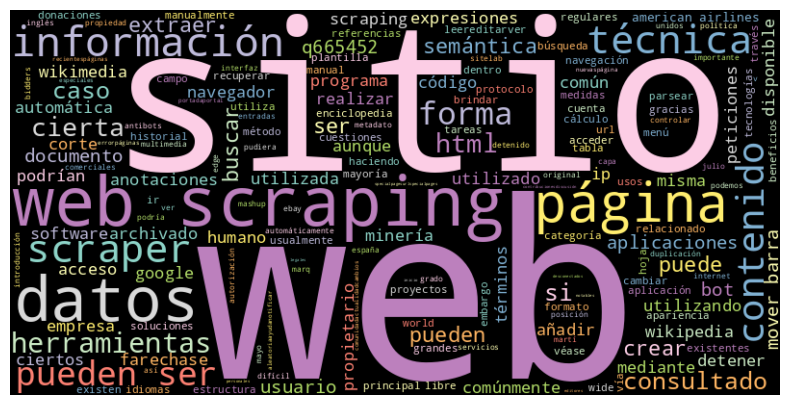

In [44]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Set3',
).generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
# Funcion para limpiar texto

def limpiar_texto(texto):

# Lista de palabras a eliminar

  palabras_a_eliminar = ['veces', 'base', 'de', 'central', 'marzo', 'marca', 'uso',
        'ocultar', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'lateral',
        'abril', 'ejemplo']

# Añexa las palabras que quiero eliminar a las stopwords

  black_list = stopwords_es.union(palabras_a_eliminar)

  texto_minuscula = texto.lower() # convierte todo el texto en minusculas

  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula) # elimina todos los signos de puntuacion

  lista_palabras = texto_sin_puntuacion.split() # divide el texto en palabras individuales

  palabras_importantes = [] # crea lista de palabras importantes

  for palabra in lista_palabras:
    if palabra not in black_list:
      palabras_importantes.append(palabra)

  return palabras_importantes

In [47]:
texto_completo = soup.get_text()

palabras_limpias = limpiar_texto(texto_completo)

texto_limpio = ' '.join(palabras_limpias)

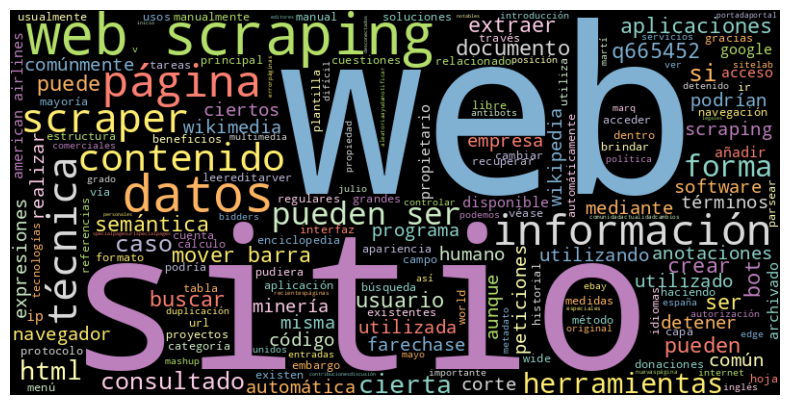

In [48]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='Set3',
).generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()